In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [6]:
all_month_data = pd.read_csv("C:\\Users\\Hussen\\OneDrive\\Desktop\\Data\\all_data_new.csv")
all_month_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",4


### Question 1: What was the best month for sales? How much was earned that month?

In [9]:
all_month_data['Revenue'] = all_month_data['Quantity Ordered'] * all_month_data['Price Each']
all_month_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Revenue
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [28]:
all_month_data.groupby('Month').sum()

,Order ID,Quantity Ordered,Price Each,Revenue
Month,,,,
1,1421630798,10903,1.811768e+06,1.822257e+06
2,1871052592,13449,2.188885e+06,2.202022e+06
3,2564810956,17005,2.791208e+06,2.807100e+06
4,3387347100,20558,3.367671e+06,3.390670e+06
5,3345871523,18667,3.135125e+06,3.152607e+06
6,2932976072,15253,2.562026e+06,2.577802e+06
7,3284139576,16072,2.632540e+06,2.647776e+06
8,2899373917,13448,2.230345e+06,2.244468e+06
9,2948726831,13109,2.084992e+06,2.097560e+06


In [80]:
revenue_by_month = np.array(all_month_data.groupby('Month').sum()['Revenue'])

In [16]:
all_month_data.groupby('Month').sum()['Revenue'][all_month_data.groupby('Month').sum()['Revenue'] == max(all_month_data.groupby('Month').sum()['Revenue'])]

Month
12    4.613443e+06
Name: Revenue, dtype: float64

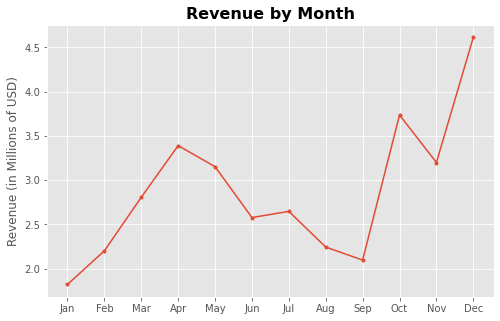

In [81]:
plt.style.use('ggplot')
plt.figure(figsize=(8,5))
name_of_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.plot(name_of_months, revenue_by_month/(10**6), marker='.')
# all_month_data.groupby('Month').sum()['Revenue'].plot(kind='line')
plt.title('Revenue by Month', fontdict={'fontweight': 'bold', 'fontsize': 16})
# plt.xticks(name_of_months)
# plt.xlabel('Month')
plt.ylabel('Revenue (in Millions of USD)')
plt.show()

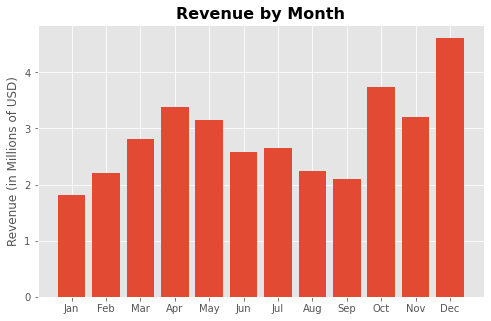

In [82]:
plt.style.use('ggplot')
plt.figure(figsize=(8,5))
name_of_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.bar(name_of_months, revenue_by_month/(10**6))
# all_month_data.groupby('Month').sum()['Revenue'].plot(kind='line')
plt.title('Revenue by Month', fontdict={'fontweight': 'bold', 'fontsize': 16})
# plt.xticks(name_of_months)
# plt.xlabel('Month')
plt.ylabel('Revenue (in Millions of USD)')
plt.show()

### Question 2: Which city had the highest number of sales? Which city had the highest revenue?

In [56]:
all_month_data['Purchase Address'][0].split(',')[1][1:]

'Dallas'

In [59]:
all_month_data['Purchase Address'][0].split(',')[2][1:3]

'TX'

In [69]:
addresses = []
for address in all_month_data['Purchase Address']:
    city = address.split(',')[1][1:] 
    state = address.split(',')[2][1:3]
    addresses.append(f'{city}, {state}')
    
all_month_data['City'] = addresses
all_month_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Revenue,City
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX"
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA"
2,176560,Google Phone,1,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA"
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA"
4,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA"


In [75]:
all_month_data.groupby('City').sum()[all_month_data.groupby('City').sum()['Quantity Ordered'] == max(all_month_data.groupby('City').sum()['Quantity Ordered'])]

,Order ID,Quantity Ordered,Price Each,Month,Revenue
City,,,,,
"San Francisco, CA",10304443952,50239,8.211462e+06,315520,8.262204e+06


In [84]:
all_month_data.groupby('City').sum()[all_month_data.groupby('City').sum()['Revenue'] == max(all_month_data.groupby('City').sum()['Revenue'])]

,Order ID,Quantity Ordered,Price Each,Month,Revenue
City,,,,,
"San Francisco, CA",10304443952,50239,8.211462e+06,315520,8.262204e+06


In [101]:
revenue_by_city = all_month_data.groupby('City').sum()['Revenue']

In [103]:
sales_by_city = all_month_data.groupby('City').sum()['Quantity Ordered']

In [94]:
cities = list(all_month_data.groupby('City').sum().index.values)

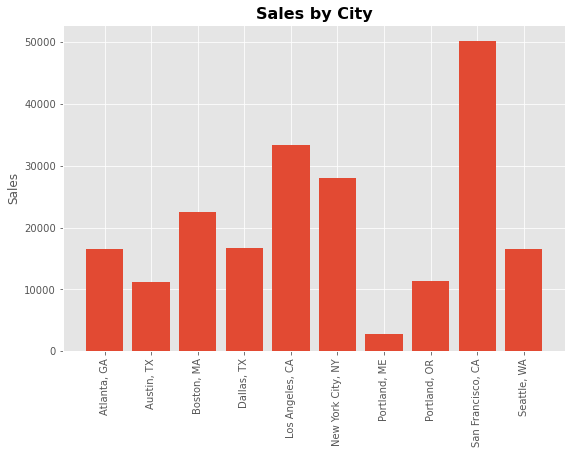

In [109]:
plt.style.use('ggplot')
plt.figure(figsize=(9,6))
plt.bar(cities, sales_by_city)
# all_month_data.groupby('Month').sum()['Revenue'].plot(kind='line')
plt.title('Sales by City', fontdict={'fontweight': 'bold', 'fontsize': 16})
plt.xticks(cities, rotation='vertical')
# plt.xlabel('City')
plt.ylabel('Sales')
plt.show()

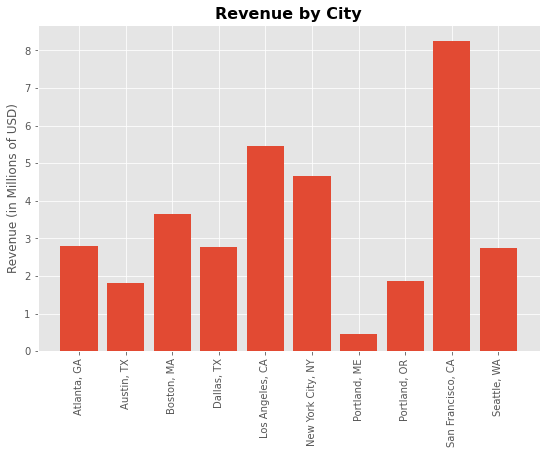

In [108]:
plt.style.use('ggplot')
plt.figure(figsize=(9,6))
plt.bar(cities, revenue_by_city/(10**6))
# all_month_data.groupby('Month').sum()['Revenue'].plot(kind='line')
plt.title('Revenue by City', fontdict={'fontweight': 'bold', 'fontsize': 16})
plt.xticks(cities, rotation='vertical')
# plt.xlabel('City')
plt.ylabel('Revenue (in Millions of USD)')
plt.show()

### Question 3: What time should we play advertisment to maximize the likelihood of a customer buying a product?

In [119]:
all_month_data['Order Date'][0].split(' ')[1].split(':')[0]

'8'

In [122]:
order_hour = []
for order_time in all_month_data['Order Date']:
    hour = order_time.split(' ')[1].split(':')[0]
    order_hour.append(hour)
    

In [133]:
all_month_data['Hour'] = order_hour

In [158]:
all_month_data['Hour'].value_counts()

19    12905
12    12587
11    12411
18    12280
20    12228
13    12129
14    10984
10    10944
21    10921
17    10899
16    10384
15    10175
22     8822
9      8748
23     6275
8      6256
7      4011
0      3910
6      2482
1      2350
5      1321
2      1243
4       854
3       831
Name: Hour, dtype: int64

In [152]:
number_of_products_sold = list(all_month_data['Hour'].value_counts().to_dict().values())

In [148]:
times = list(all_month_data['Hour'].value_counts().to_dict().keys())

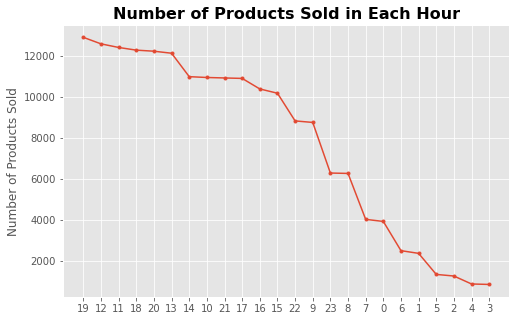

In [157]:
plt.figure(figsize=(8,5))
plt.plot(times, number_of_products_sold, marker='.')
# all_month_data['Hour'].value_counts().plot(kind='line', marker='.')
plt.title('Number of Products Sold in Each Hour', fontdict={'fontweight': 'bold', 'fontsize': 16})
plt.xticks(times)
# plt.xlabel('Hour of Day')
plt.ylabel('Number of Products Sold')
plt.show()

In [202]:
all_month_data.groupby('Hour').sum()

,Order ID,Quantity Ordered,Price Each,Month,Revenue
Hour,,,,,
0,900957895,4428,709296.70,27554,713721.27
1,543233054,2619,458490.00,16657,460866.88
10,2516582820,12308,1932665.62,76928,1944286.77
11,2860187075,14005,2288855.18,87654,2300610.24
12,2904640163,14202,2299876.68,89161,2316821.34
13,2796951036,13685,2139743.86,85808,2155389.80
14,2534309930,12362,2072194.77,77836,2083672.73
15,2348411394,11391,1931174.99,72060,1941549.60
16,2386887406,11662,1892454.54,72939,1904601.31


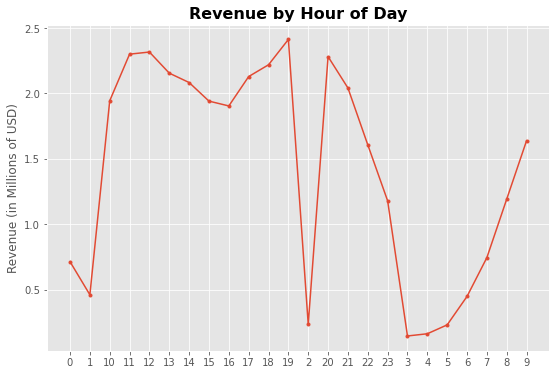

In [207]:
# all_month_data.groupby('Hour').sum()['Revenue'].plot(kind='line')
plt.figure(figsize=(9,6))
plt.plot(list(all_month_data.groupby('Hour').sum().index), all_month_data.groupby('Hour').sum()['Revenue']/(10**6), marker='.')
plt.title('Revenue by Hour of Day', fontdict={'fontweight': 'bold', 'fontsize': 16})
plt.ylabel('Revenue (in Millions of USD)')
plt.xticks(list(all_month_data.groupby('Hour').sum().index))
plt.show()

### Question 4: What products are most often sold together?

In [228]:
all_month_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Revenue,City,Hour
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX",8
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA",22
2,176560,Google Phone,1,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA",14
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",14
4,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",9


In [239]:
df = all_month_data[all_month_data['Order ID'].duplicated(keep=False)]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Revenue,City,Hour
2,176560,Google Phone,1,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA",14
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",14
17,176574,Google Phone,1,600.00,4/3/2019 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA",19
18,176574,USB-C Charging Cable,1,11.95,4/3/2019 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,"Los Angeles, CA",19
29,176585,Bose SoundSport Headphones,1,99.99,4/7/2019 11:31,"823 Highland St, Boston, MA 02215",4,99.99,"Boston, MA",11


In [251]:
df['Same ID Products'] = df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))
df.head()

<ipython-input-251-13893b50014a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Same ID Products'] = df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Revenue,City,Hour,Same ID Products
2,176560,Google Phone,1,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA",14,"Google Phone, Wired Headphones"
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",14,"Google Phone, Wired Headphones"
17,176574,Google Phone,1,600.00,4/3/2019 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA",19,"Google Phone, USB-C Charging Cable"
18,176574,USB-C Charging Cable,1,11.95,4/3/2019 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,"Los Angeles, CA",19,"Google Phone, USB-C Charging Cable"
29,176585,Bose SoundSport Headphones,1,99.99,4/7/2019 11:31,"823 Highland St, Boston, MA 02215",4,99.99,"Boston, MA",11,"Bose SoundSport Headphones, Bose SoundSport He..."


In [326]:
df = df[['Order ID', 'Same ID Products']].drop_duplicates()
df.head()

,Order ID,Same ID Products
2,176560,"Google Phone, Wired Headphones"
17,176574,"Google Phone, USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
31,176586,"AAA Batteries (4-pack), Google Phone"
118,176672,"Lightning Charging Cable, USB-C Charging Cable"


In [ ]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Same ID Products']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    


### Question 5: What product sold the most? Why did it sell the most?

In [260]:
all_month_data.groupby('Product').sum()

,Order ID,Quantity Ordered,Price Each,Month,Revenue
Product,,,,,
20in Monitor,950889651,4129,451068.99,29336,454148.71
27in 4K Gaming Monitor,1442588628,6244,2429637.70,44440,2435097.56
27in FHD Monitor,1724223743,7550,1125974.93,52558,1132424.50
34in Ultrawide Monitor,1418985948,6199,2348718.19,43304,2355558.01
AA Batteries (4-pack),4744173938,27635,79015.68,145558,106118.40
AAA Batteries (4-pack),4764959472,31017,61716.59,146370,92740.83
Apple Airpods Headphones,3579120098,15661,2332350.00,109477,2349150.00
Bose SoundSport Headphones,3071496156,13457,1332366.75,94113,1345565.43
Flatscreen TV,1110943207,4819,1440000.00,34224,1445700.00


In [287]:
quantity_of_products = all_month_data.groupby('Product').sum()['Quantity Ordered']
price_of_products = np.array(all_month_data.groupby('Product').sum()['Price Each']/all_month_data.groupby('Product').sum()['Quantity Ordered'])

In [276]:
products = all_month_data.groupby('Product').sum().index
products

Index(['20in Monitor', '27in 4K Gaming Monitor', '27in FHD Monitor',
       '34in Ultrawide Monitor', 'AA Batteries (4-pack)',
       'AAA Batteries (4-pack)', 'Apple Airpods Headphones',
       'Bose SoundSport Headphones', 'Flatscreen TV', 'Google Phone',
       'LG Dryer', 'LG Washing Machine', 'Lightning Charging Cable',
       'Macbook Pro Laptop', 'ThinkPad Laptop', 'USB-C Charging Cable',
       'Vareebadd Phone', 'Wired Headphones', 'iPhone'],
      dtype='object', name='Product')

<ipython-input-292-be4e7798721f>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical')


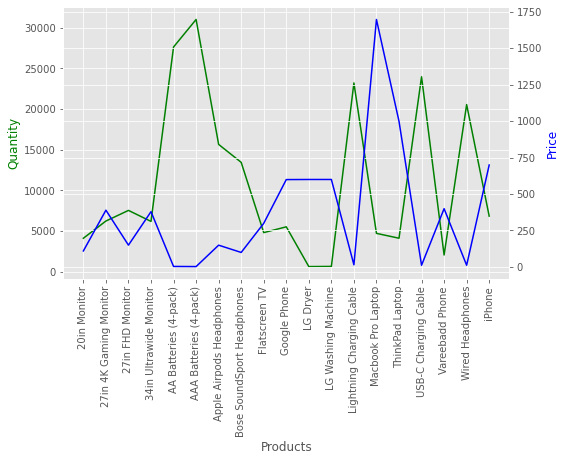

In [292]:
# ax1.figure(figsize=(8,5))
plt.rcParams["figure.figsize"] = (8,5)

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(products, quantity_of_products, 'g-')
ax2.plot(products, price_of_products, 'b-')

ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity', color='g')
ax2.set_ylabel('Price', color='b')
ax1.set_xticklabels(products, rotation='vertical')

plt.show()

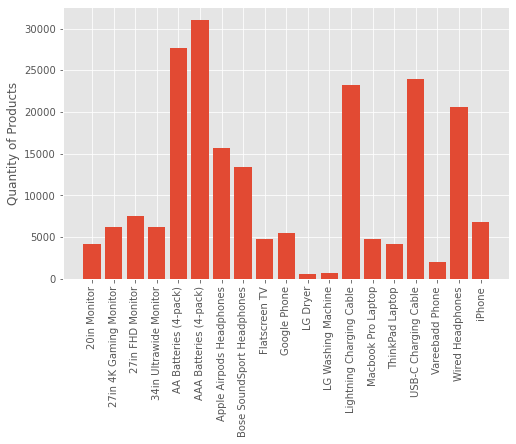

In [295]:
plt.figure(figsize=(8,5))
plt.bar(products, quantity_of_products)
plt.ylabel('Quantity of Products')
plt.xticks(products, rotation='vertical')
plt.show()

<ipython-input-325-a43476622337>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical')


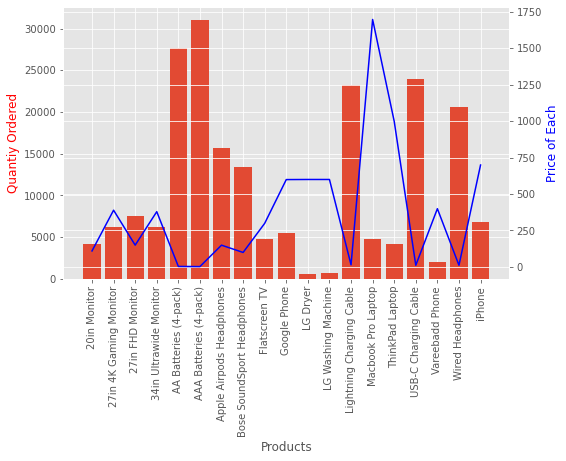

In [325]:
plt.rcParams["figure.figsize"] = (8,5)

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_of_products)
ax2.plot(products, price_of_products, 'b-')

ax1.set_xlabel('Products')
ax1.set_ylabel('Quantiy Ordered', color='r')
ax2.set_ylabel('Price of Each', color='b')
ax1.set_xticklabels(products, rotation='vertical')

plt.show()

In [271]:
revenue_of_products = all_month_data.groupby('Product').sum()['Revenue']

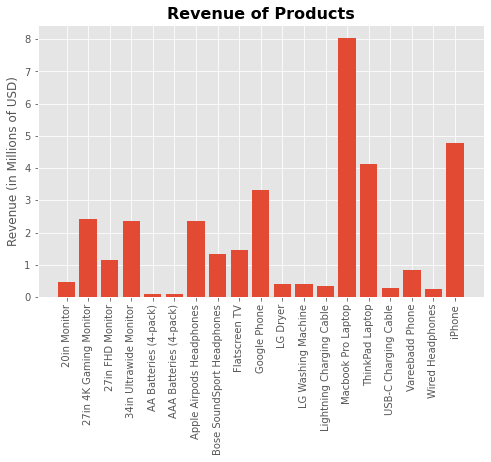

In [294]:
plt.figure(figsize=(8,5))
plt.bar(products, revenue_of_products/(10**6))
plt.title('Revenue of Products', fontdict={'fontweight': 'bold', 'fontsize': 16})
plt.ylabel('Revenue (in Millions of USD)')
plt.xticks(products, rotation='vertical')
plt.show()

<ipython-input-324-136a255a85ad>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical')


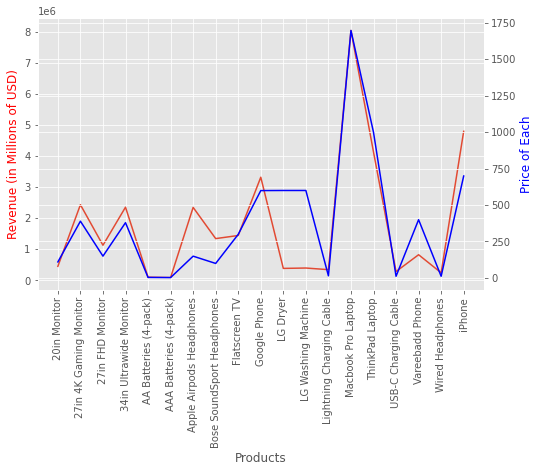

In [324]:
# ax1.figure(figsize=(8,5))
plt.rcParams["figure.figsize"] = (8,5)

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(products, revenue_of_products)
ax2.plot(products, price_of_products, 'b-')

ax1.set_xlabel('Products')
ax1.set_ylabel('Revenue (in Millions of USD)', color='r')
ax2.set_ylabel('Price of Each', color='b')
ax1.set_xticklabels(products, rotation='vertical')

plt.show()